In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
happydf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio2 - LEEGA/world-happiness-report.csv', sep=",")  

In [4]:
happydf

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [5]:
happydf.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [6]:
happydf.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


# Renomeando as colunas

In [7]:
happydf.rename(columns = {'Country name':'Country_name'}, inplace = True)
happydf.rename(columns = {'year':'Year'}, inplace = True)
happydf.rename(columns = {'Life Ladder':'Life_ladder'}, inplace = True)
happydf.rename(columns = {'Log GDP per capita':'Log_GDP_per_capita'}, inplace = True)
happydf.rename(columns = {'Social support':'Social_support'}, inplace = True)
happydf.rename(columns = {'Healthy life expectancy at birth':'Healthy_life_expectancy_at_birth'}, inplace = True)
happydf.rename(columns = {'Freedom to make life choices':'Freedom_to_make_life_choices'}, inplace = True)
happydf.rename(columns = {'Perceptions of corruption':'Perceptions_of_corruption'}, inplace = True)
happydf.rename(columns = {'Positive affect':'Positive_affect'}, inplace = True)
happydf.rename(columns = {'Negative affect':'Negative_affect'}, inplace = True)
happydf

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


# Tratando dados nulos

In [8]:
happydf.isnull().sum()

Country_name                          0
Year                                  0
Life_ladder                           0
Log_GDP_per_capita                   36
Social_support                       13
Healthy_life_expectancy_at_birth     55
Freedom_to_make_life_choices         32
Generosity                           89
Perceptions_of_corruption           110
Positive_affect                      22
Negative_affect                      16
dtype: int64

In [9]:
# Calcula a porcentagem de valores nulos em cada coluna
porcentagem_nulos = happydf.isnull().sum() / len(happydf)*100

print(porcentagem_nulos)

Country_name                        0.000000
Year                                0.000000
Life_ladder                         0.000000
Log_GDP_per_capita                  1.847101
Social_support                      0.667009
Healthy_life_expectancy_at_birth    2.821960
Freedom_to_make_life_choices        1.641868
Generosity                          4.566444
Perceptions_of_corruption           5.643920
Positive_affect                     1.128784
Negative_affect                     0.820934
dtype: float64


In [10]:
# Analisando uma das colunas com valores faltantes
happydf[happydf['Log_GDP_per_capita'].isnull()]

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
423,Cuba,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
436,Cyprus,2020,6.260,NaN,0.806,74.10,0.763,NaN,0.816,0.759,0.284
709,Hong Kong S.A.R. of China,2020,5.295,NaN,0.813,NaN,0.705,NaN,0.380,0.609,0.210
771,Iran,2018,4.278,NaN,0.674,66.00,0.603,NaN,0.703,0.553,0.493
772,Iran,2019,5.006,NaN,0.698,66.30,0.623,NaN,0.728,0.600,0.449
773,Iran,2020,4.865,NaN,0.757,66.60,0.600,NaN,0.710,0.582,0.470
918,Kosovo,2020,6.294,NaN,0.792,NaN,0.880,NaN,0.910,0.726,0.201
1087,Malta,2020,6.157,NaN,0.938,72.20,0.931,NaN,0.675,0.601,0.411
1280,North Cyprus,2012,5.463,NaN,0.871,NaN,0.693,NaN,0.855,0.709,0.405
1281,North Cyprus,2013,5.567,NaN,0.869,NaN,0.775,NaN,0.715,0.622,0.443


In [11]:
# Calcula a média dos valores das colunas por país
media_pais1 = happydf.groupby('Country_name')['Log_GDP_per_capita'].transform('mean')
media_pais2 = happydf.groupby('Country_name')['Social_support'].transform('mean')
media_pais3 = happydf.groupby('Country_name')['Healthy_life_expectancy_at_birth'].transform('mean')
media_pais4 = happydf.groupby('Country_name')['Freedom_to_make_life_choices'].transform('mean')
media_pais5 = happydf.groupby('Country_name')['Generosity'].transform('mean')
media_pais6 = happydf.groupby('Country_name')['Perceptions_of_corruption'].transform('mean')
media_pais7 = happydf.groupby('Country_name')['Positive_affect'].transform('mean')
media_pais8 = happydf.groupby('Country_name')['Negative_affect'].transform('mean')


# Preenche os valores nulos com a média dos valores por país
happydf['Log_GDP_per_capita'].fillna(media_pais1, inplace=True)
happydf['Social_support'].fillna(media_pais2, inplace=True)
happydf['Healthy_life_expectancy_at_birth'].fillna(media_pais3, inplace=True)
happydf['Freedom_to_make_life_choices'].fillna(media_pais4, inplace=True)
happydf['Generosity'].fillna(media_pais5, inplace=True)
happydf['Perceptions_of_corruption'].fillna(media_pais6, inplace=True)
happydf['Positive_affect'].fillna(media_pais7, inplace=True)
happydf['Negative_affect'].fillna(media_pais8, inplace=True)

In [12]:
# Observando os dados faltantes da coluna 'Log_GDP_per_capita'
happydf[happydf['Log_GDP_per_capita'].isnull()]

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
423,Cuba,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
1280,North Cyprus,2012,5.463,NaN,0.871,NaN,0.693,NaN,0.855,0.709,0.405
1281,North Cyprus,2013,5.567,NaN,0.869,NaN,0.775,NaN,0.715,0.622,0.443
1282,North Cyprus,2014,5.786,NaN,0.802,NaN,0.830,NaN,0.692,0.724,0.311
1283,North Cyprus,2015,5.843,NaN,0.791,NaN,0.785,NaN,0.659,0.702,0.319
1284,North Cyprus,2016,5.827,NaN,0.808,NaN,0.796,NaN,0.670,0.644,0.346
1285,North Cyprus,2018,5.608,NaN,0.837,NaN,0.797,NaN,0.614,0.480,0.262
1286,North Cyprus,2019,5.467,NaN,0.803,NaN,0.793,NaN,0.640,0.494,0.296
1559,Somalia,2014,5.528,NaN,0.611,49.60,0.874,NaN,0.456,0.834,0.207
1560,Somalia,2015,5.354,NaN,0.599,50.10,0.968,NaN,0.410,0.901,0.187


In [13]:
# Calcula a média dos valores das colunas 
media1 = happydf['Log_GDP_per_capita'].mean()
media2 = happydf['Social_support'].mean()
media3 = happydf['Healthy_life_expectancy_at_birth'].mean()
media4 = happydf['Freedom_to_make_life_choices'].mean()
media5 = happydf['Generosity'].mean()
media6 = happydf['Perceptions_of_corruption'].mean()
media7 = happydf['Positive_affect'].mean()
media8 = happydf['Negative_affect'].mean()


# Preenche o resto dos valores nulos com as medias de cada coluna
happydf['Log_GDP_per_capita'].fillna(media1, inplace=True)
happydf['Social_support'].fillna(media2, inplace=True)
happydf['Healthy_life_expectancy_at_birth'].fillna(media3, inplace=True)
happydf['Freedom_to_make_life_choices'].fillna(media4, inplace=True)
happydf['Generosity'].fillna(media5, inplace=True)
happydf['Perceptions_of_corruption'].fillna(media6, inplace=True)
happydf['Positive_affect'].fillna(media7, inplace=True)
happydf['Negative_affect'].fillna(media8, inplace=True)
happydf

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [14]:
# Todos os valores nulos foram substituidos
happydf.isnull().sum()

Country_name                        0
Year                                0
Life_ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    0
Freedom_to_make_life_choices        0
Generosity                          0
Perceptions_of_corruption           0
Positive_affect                     0
Negative_affect                     0
dtype: int64

# Procurando outliers

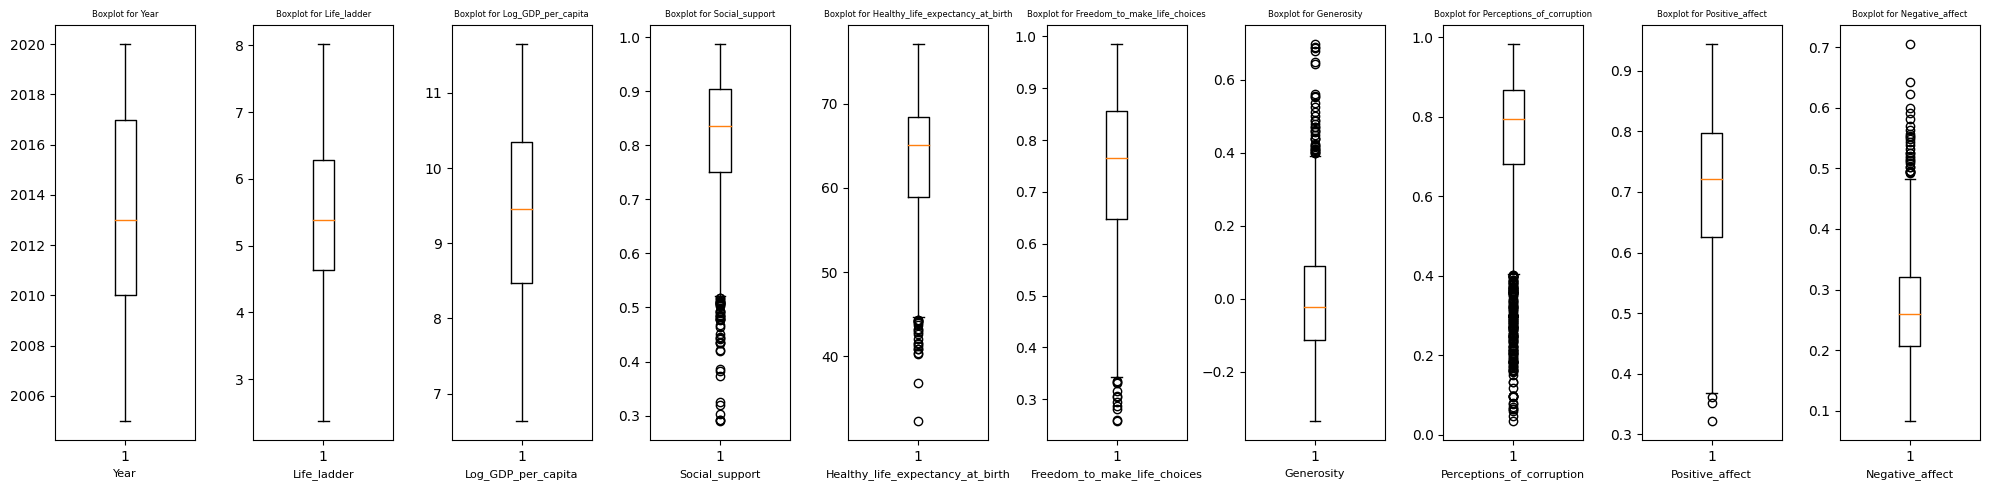

In [15]:
# Seleciona colunas numericas e cria uma figura
cols = happydf.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5))

# Cria um boxplot para cada coluna
for i, col in enumerate(cols):
    axs[i].boxplot(happydf[col])
    axs[i].set_title(f'Boxplot for {col}', fontsize= 6)
    axs[i].set_xlabel(col,fontsize = 8)

fig.tight_layout()
plt.show()

# Qual foi o pais com menor indice "Life Ladder"?

In [16]:
# Cria um df com as colunas 'Country_name','Year','Life_ladder'
happydf[['Country_name','Year','Life_ladder']].sort_values(by='Life_ladder',ascending = True)

,Country_name,Year,Life_ladder
11,Afghanistan,2019,2.375
9,Afghanistan,2017,2.662
1667,Syria,2013,2.688
311,Central African Republic,2016,2.693
10,Afghanistan,2018,2.694
...,...,...,...
450,Denmark,2007,7.834
561,Finland,2018,7.858
563,Finland,2020,7.889
451,Denmark,2008,7.971


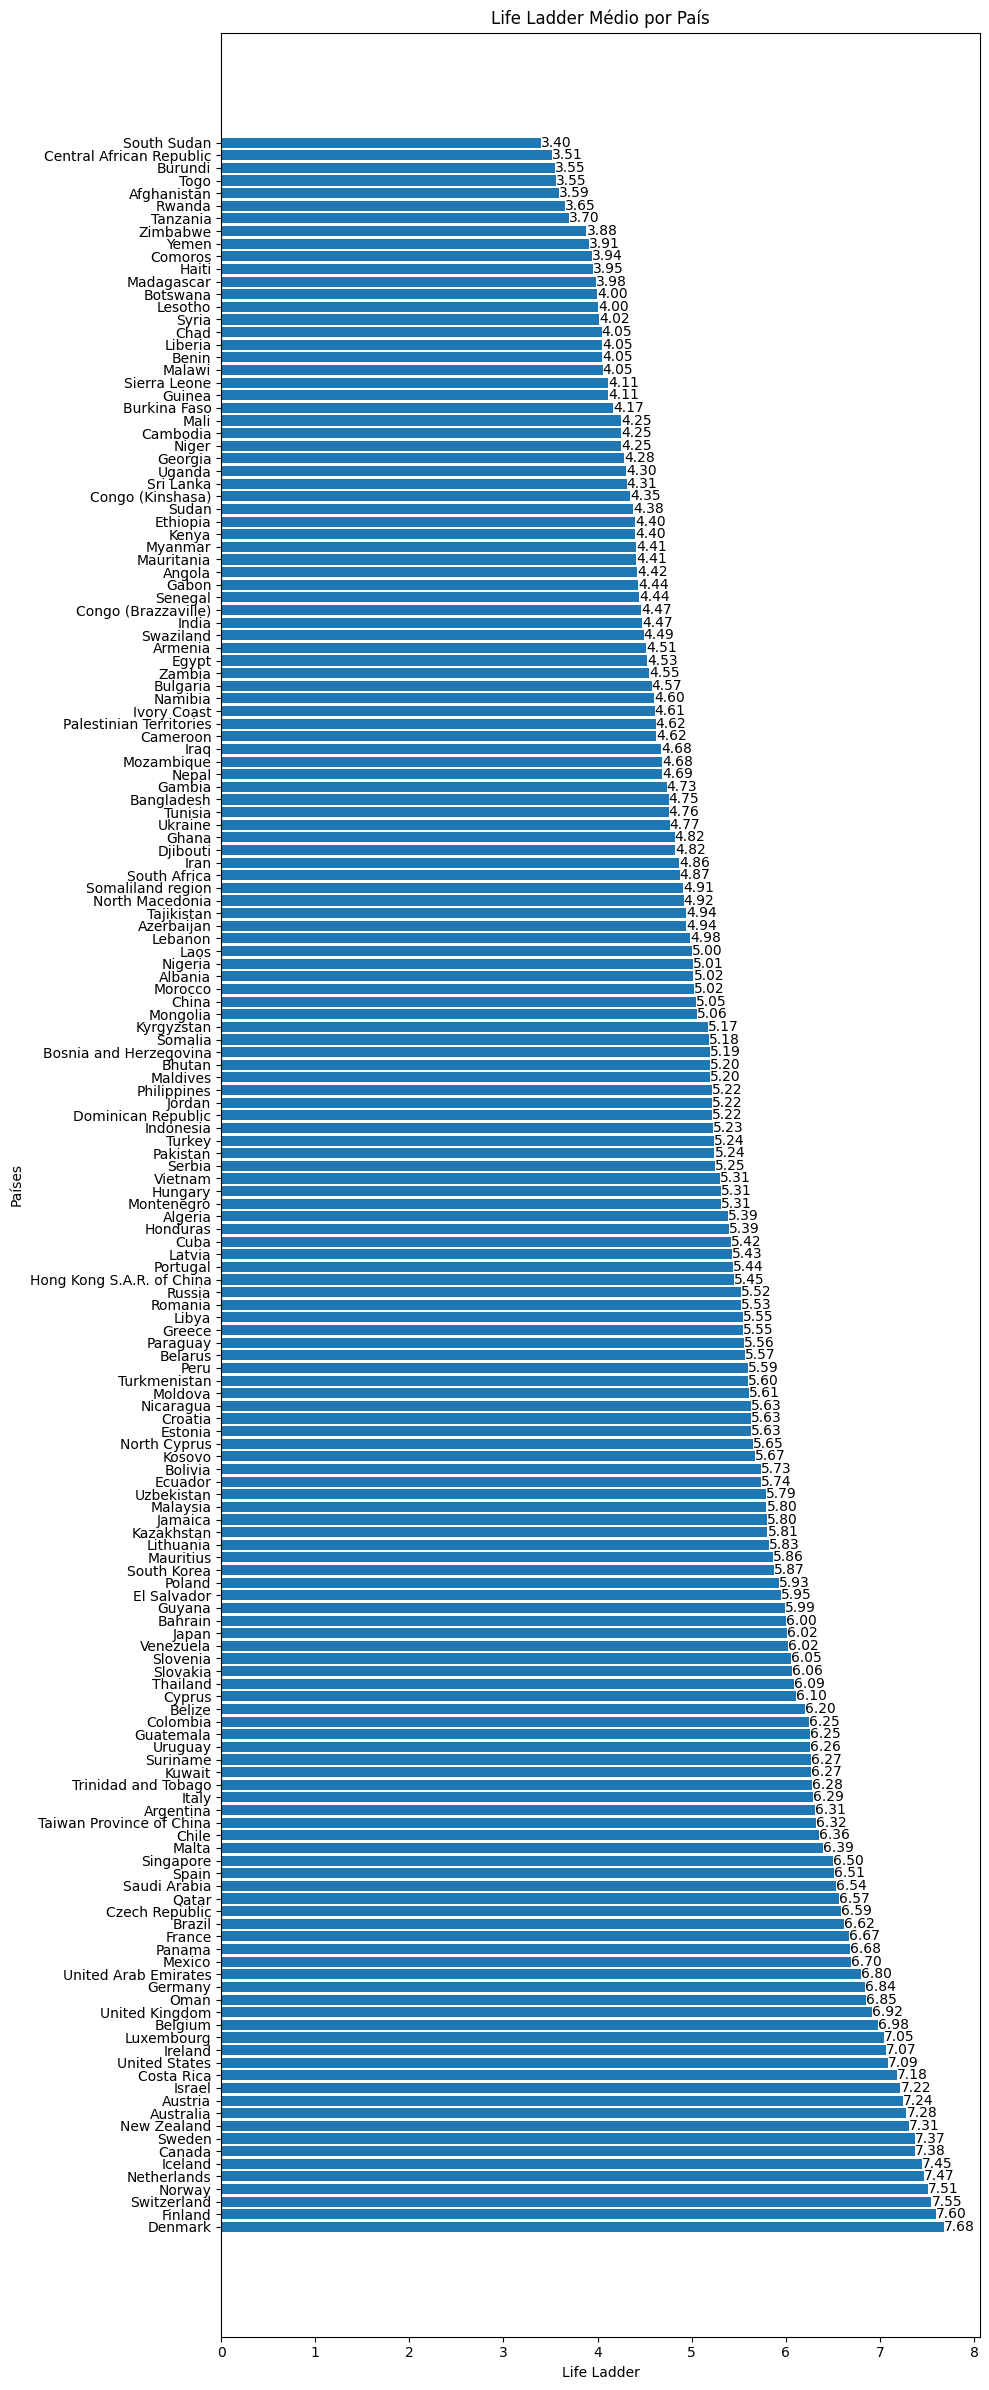

In [17]:
# Agrupa os valores do 'Life_ladder' por 'Country_name' e calcula a média
grouped_df = happydf.groupby('Country_name')['Life_ladder'].mean().reset_index()

# Classifica o df por 'Life_ladder'
grouped_df = grouped_df.sort_values('Life_ladder', ascending=False)
# Cria o gráfico de barras horizontais
plt.figure(figsize=(10,24))  
plt.barh(grouped_df['Country_name'], grouped_df['Life_ladder'])

# Adiciona o valor de 'Life_Ladder' ao lado de cada barra
for i, value in enumerate(grouped_df['Life_ladder']):
    plt.text(value, i, f"{value:.2f}", ha='left', va='center')

# Personaliza os eixos
plt.xlabel('Life Ladder')
plt.ylabel('Países')
plt.title('Life Ladder Médio por País')

plt.tight_layout() 
plt.show()

# Qual é a média de "Generosity" dos TOP 10 países, por ano?

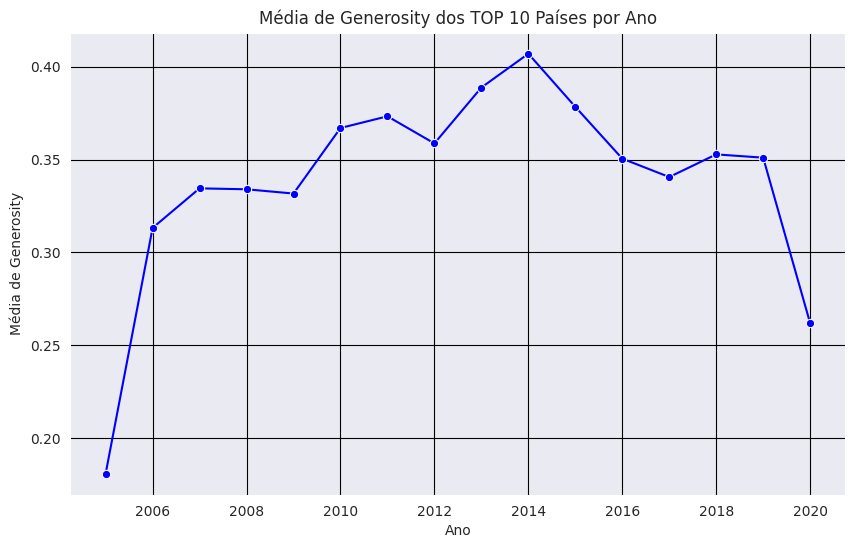

In [18]:
# Cria um df de 'Generosity' em ordem decrescente
df_sorted = happydf.sort_values('Generosity', ascending=False)

# Seleciona os 10 paises com maior 'Generosity' para cada ano
top_10_countries = df_sorted.groupby('Year').head(10)

# Calcula a média de 'Generosity' dos TOP 10 países por ano
avg_generosity = top_10_countries.groupby('Year')['Generosity'].mean()

# Cria um gráfico de linha com a média com os top 10 paises da coluna 'Generosity' de cada ano 
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_generosity.index, y=avg_generosity.values, marker='o', color='blue')

# Personaliza o gráfico
plt.xlabel('Ano')
plt.ylabel('Média de Generosity')
plt.title('Média de Generosity dos TOP 10 Países por Ano')
plt.gca().grid(True,color='black')

plt.show()

In [19]:
# Cria um gráfico de coluna com a média com os top 10 países da coluna 'Generosity' de cada ano 
fig = px.bar(x=avg_generosity.index, y=avg_generosity.values,text=(avg_generosity).round(2).astype(str))

# Personaliza o gráfico
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Média de Generosity',
    title='Média de Generosity dos TOP 10 Países por Ano',
    xaxis_gridcolor='black',
    yaxis_gridcolor='black'
)

fig.show()

In [20]:
# Obtém um df de 'Country_name' que apareceram no top10 de cada ano sem duplicidade,triplicidade,etc para mesmo ano e pais
country_year = top_10_countries[['Country_name', 'Year']].drop_duplicates()

# Agrupa por país e mostra os anos em que cada país apareceu
grouped_table = country_year.groupby('Country_name')['Year'].apply(list).reset_index()

# Ordena a tabela pela contagem de valores na coluna "Year"
df_grouped = grouped_table.sort_values(by='Year', key=lambda x: x.apply(len))
df_grouped['Year'] = df_grouped['Year'].apply(sorted)

# Reseta o índice
df_grouped = df_grouped.reset_index(drop=True)

df_grouped = pd.DataFrame(df_grouped)
df_grouped

,Country_name,Year
0,Switzerland,[2006]
1,Norway,[2017]
2,Italy,[2009]
3,Iran,[2005]
4,Singapore,[2007]
5,Sweden,[2005]
6,Germany,[2005]
7,Lebanon,[2005]
8,Ethiopia,[2020]
9,Syria,[2012]


### Teste de funcionamento

In [21]:
# Obeservando os top 10 paises com maior generosity filtrado por ano
top_10_countries[top_10_countries['Year']== 2020]

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
1190,Myanmar,2020,4.431,8.554000,0.796,59.600000,0.825,0.470000,0.647,0.800,0.289
1087,Malta,2020,6.157,10.500545,0.938,72.200000,0.931,0.311273,0.675,0.601,0.411
1711,Tanzania,2020,3.786,7.881000,0.740,58.500000,0.830,0.295000,0.521,0.686,0.271
1726,Thailand,2020,5.885,9.769000,0.867,67.600000,0.840,0.273000,0.918,0.783,0.326
904,Kenya,2020,4.547,8.365000,0.674,61.300000,0.702,0.260000,0.837,0.733,0.297
79,Australia,2020,7.137,10.760000,0.937,74.200000,0.905,0.210000,0.491,0.769,0.205
709,Hong Kong S.A.R. of China,2020,5.295,10.888700,0.813,63.383266,0.705,0.208000,0.380,0.609,0.210
1835,United Kingdom,2020,6.798,10.626000,0.929,72.700000,0.885,0.203000,0.490,0.758,0.225
635,Ghana,2020,5.319,8.590000,0.643,58.000000,0.824,0.200000,0.847,0.713,0.253
550,Ethiopia,2020,4.549,7.711000,0.823,59.500000,0.769,0.188000,0.784,0.669,0.252


In [22]:
# Confirmando que o codigo acima está correto,fazendo a análise do df original
happydf[happydf['Year'] == 2020].sort_values(by='Generosity',ascending=False).head(10)

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
1190,Myanmar,2020,4.431,8.554000,0.796,59.600000,0.825,0.470000,0.647,0.800,0.289
1087,Malta,2020,6.157,10.500545,0.938,72.200000,0.931,0.311273,0.675,0.601,0.411
1711,Tanzania,2020,3.786,7.881000,0.740,58.500000,0.830,0.295000,0.521,0.686,0.271
1726,Thailand,2020,5.885,9.769000,0.867,67.600000,0.840,0.273000,0.918,0.783,0.326
904,Kenya,2020,4.547,8.365000,0.674,61.300000,0.702,0.260000,0.837,0.733,0.297
79,Australia,2020,7.137,10.760000,0.937,74.200000,0.905,0.210000,0.491,0.769,0.205
709,Hong Kong S.A.R. of China,2020,5.295,10.888700,0.813,63.383266,0.705,0.208000,0.380,0.609,0.210
1835,United Kingdom,2020,6.798,10.626000,0.929,72.700000,0.885,0.203000,0.490,0.758,0.225
635,Ghana,2020,5.319,8.590000,0.643,58.000000,0.824,0.200000,0.847,0.713,0.253
550,Ethiopia,2020,4.549,7.711000,0.823,59.500000,0.769,0.188000,0.784,0.669,0.252


# TOP 5 tiveram maior queda de "Generosity" ao longo dos anos


## Analisando generosity pelas pequenas variações

In [23]:
diff_df = pd.DataFrame()

# Obtem os anos únicos do happydf
years_unique = happydf['Year'].unique()
years_unique.sort()

# Calcula as diferenças de "Generosity" para cada par de anos consecutivos
for i in range(1, len(years_unique)):
    current_year = years_unique[i]
    previous_year = years_unique[i-1]
    
    # Seleciona as "Generosity" do ano atual e do ano anterior
    current_data = happydf[happydf['Year'] == current_year].set_index('Country_name')['Generosity']
    previous_data = happydf[happydf['Year'] == previous_year].set_index('Country_name')['Generosity']
    
    # Calcula a diferença de "Generosity" entre o ano atual e o anterior
    diff = current_data - previous_data
    
    # Adiciona a diferença ao um dataframe
    column_name = f'Generosity de {previous_year}-{current_year}'
    diff_df[column_name] = diff

# Calcula a soma da variação de generosidade para cada país
diff_df['Sum_Difference'] = diff_df.sum(axis=1)

diff_df = pd.DataFrame(diff_df)
diff_df

,Generosity de 2005-2006,Generosity de 2006-2007,Generosity de 2007-2008,Generosity de 2008-2009,Generosity de 2009-2010,Generosity de 2010-2011,Generosity de 2011-2012,Generosity de 2012-2013,Generosity de 2013-2014,Generosity de 2014-2015,Generosity de 2015-2016,Generosity de 2016-2017,Generosity de 2017-2018,Generosity de 2018-2019,Generosity de 2019-2020,Sum_Difference
Country_name,,,,,,,,,,,,,,,,
Argentina,NaN,0.016,0.009,0.002,0.004,-0.048,0.026,0.018,-0.034,-0.010,-0.018,0.006000,-0.025000,0.000,0.089,0.035
Armenia,NaN,-0.020,0.036,0.001,0.038,-0.049,0.010,0.020,-0.023,0.015,0.033,0.023000,-0.016000,-0.009,NaN,0.059
Australia,NaN,NaN,-0.042,NaN,NaN,0.052,-0.095,-0.005,0.050,0.013,-0.093,0.078000,-0.171000,-0.025,0.089,-0.149
Austria,NaN,NaN,NaN,NaN,NaN,0.001,-0.014,0.050,-0.050,-0.019,-0.019,0.053000,-0.080000,0.007,-0.049,-0.120
Azerbaijan,NaN,0.028,0.178,-0.058,-0.036,0.018,-0.035,-0.028,-0.040,0.010,-0.006,-0.021000,-0.007000,0.018,NaN,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,NaN,NaN,NaN,0.036,-0.043,0.072,-0.079,0.003,0.095,0.314,-0.167,-0.085000,0.195000,-0.014,NaN,0.327
Venezuela,0.133182,NaN,NaN,0.109,-0.039,-0.071,0.033,-0.027,0.021,0.082,-0.038,-0.014000,0.004818,0.000,0.000,0.194
Vietnam,NaN,0.074,0.112,-0.263,0.056,0.111,-0.215,0.083,0.027,0.086,-0.176,0.092615,-0.043615,-0.085,NaN,-0.141


In [24]:
# Classifica os países com base na soma
diff_df_top5 = diff_df.sort_values('Sum_Difference').head(5)
diff_df_top5

,Generosity de 2005-2006,Generosity de 2006-2007,Generosity de 2007-2008,Generosity de 2008-2009,Generosity de 2009-2010,Generosity de 2010-2011,Generosity de 2011-2012,Generosity de 2012-2013,Generosity de 2013-2014,Generosity de 2014-2015,Generosity de 2015-2016,Generosity de 2016-2017,Generosity de 2017-2018,Generosity de 2018-2019,Generosity de 2019-2020,Sum_Difference
Country_name,,,,,,,,,,,,,,,,
Singapore,NaN,0.155,-0.247,-0.121,0.057,-0.131,NaN,NaN,0.039,-0.004,-0.007,-0.007,-0.202,0.093,NaN,-0.375
Ireland,NaN,NaN,NaN,-0.007,0.033,0.035,-0.081,0.029,-0.067,-0.031,-0.059,0.042,-0.072,-0.070,-0.060,-0.308
Italy,NaN,NaN,-0.064,0.191,-0.300,0.042,0.131,-0.215,0.037,0.001,-0.017,0.046,0.014,-0.061,-0.068,-0.263
Czech Republic,NaN,NaN,NaN,NaN,NaN,-0.064,-0.048,-0.002,-0.012,0.022,-0.051,0.020,-0.115,NaN,NaN,-0.250
Belgium,NaN,NaN,-0.062,NaN,NaN,-0.036,-0.036,0.067,-0.016,0.061,-0.118,0.110,-0.179,-0.047,0.008,-0.248


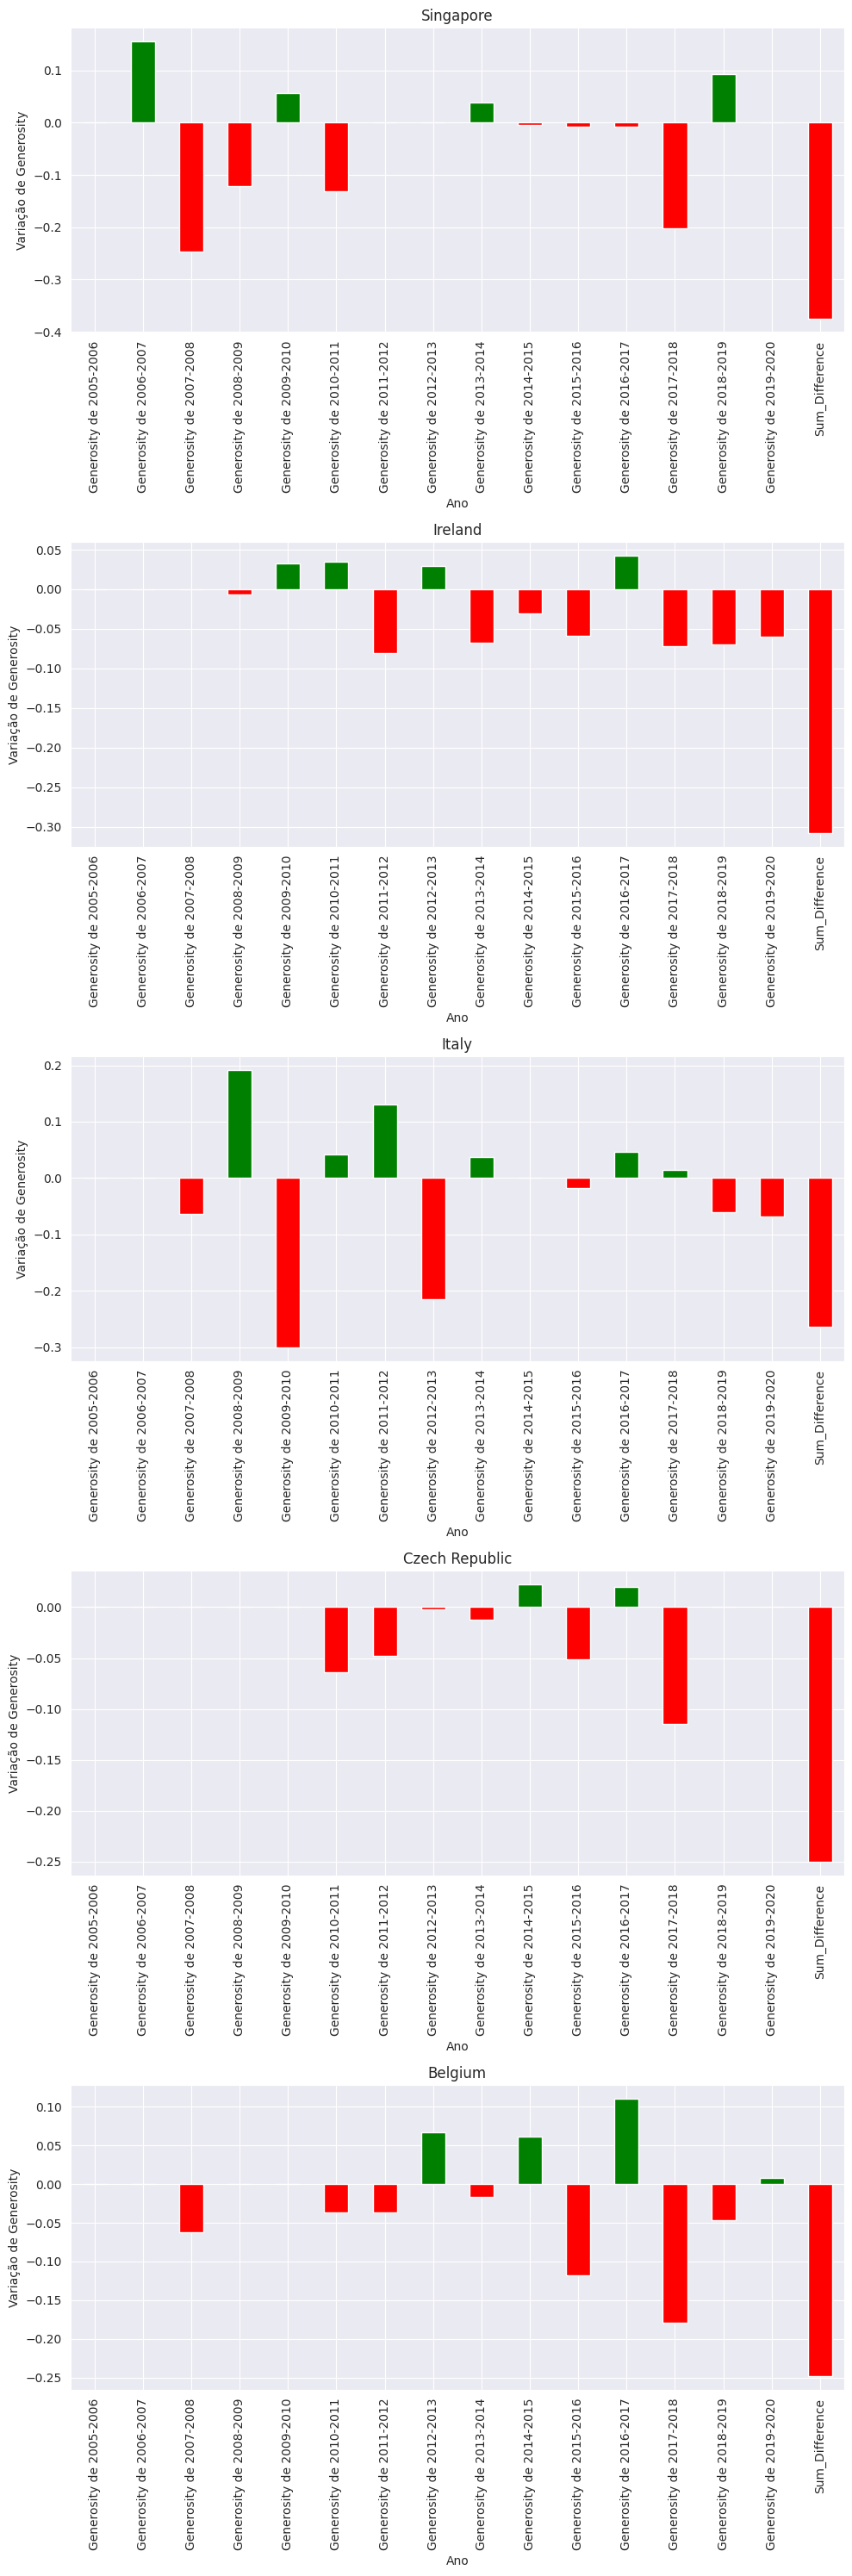

In [25]:
# Define o tamanho da figura
fig, axs = plt.subplots(nrows=len(diff_df_top5), figsize=(10, 6 * len(diff_df_top5)))

# Cria um gráfico para cada país no TOP 5
for i,country in enumerate(diff_df_top5.index):
    ax = axs[i]
    
    # Obtém as variações de "Generosity" para o país atual
    variations = diff_df_top5.loc[country]
    
    # Define as cores das barras com base nas variações positivas ou negativas
    colors = ['red' if v < 0 else 'green' for v in variations]
    
    # Plota o gráfico de barras das variações de "Generosity"
    variations.plot(kind='bar', ax=ax, color=colors)
    
    # Configurando do gráfico
    ax.set_xlabel('Ano')
    ax.set_ylabel('Variação de Generosity')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## Analisando generosity apenas pela variação total

In [26]:
# Agrupa os valores de 'Generosity' por 'Country_name' e calcule a diferença entre o primeiro e o último ano
diff_generosity = happydf.groupby('Country_name')['Generosity'].last() - happydf.groupby('Country_name')['Generosity'].first()

# Ordena os países em ordem decrescente com base na diferença de 'Generosity'
top_countries_diff = diff_generosity.sort_values(ascending=True).head(5)

top_countries_diff

Country_name
Switzerland   -0.354
Laos          -0.298
Austria       -0.291
Afghanistan   -0.276
Guatemala     -0.234
Name: Generosity, dtype: float64

In [27]:
# Analisando 'Generosity'
happydf[happydf['Country_name'] == 'Italy'].sort_values(by='Year')

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
815,Italy,2005,6.854,10.703,0.928,71.90,0.802,-0.011643,0.944,0.679,0.295
816,Italy,2007,6.574,10.727,0.912,72.26,0.684,0.113000,0.922,0.716,0.303
817,Italy,2008,6.780,10.711,0.880,72.44,0.543,0.049000,0.946,0.637,0.268
818,Italy,2009,6.334,10.652,0.880,72.62,0.701,0.240000,0.890,0.775,0.279
819,Italy,2010,6.354,10.666,0.872,72.80,0.738,-0.060000,0.921,0.596,0.236
820,Italy,2011,6.057,10.671,0.913,72.84,0.568,-0.018000,0.933,0.658,0.266
821,Italy,2012,5.839,10.638,0.869,72.88,0.570,0.113000,0.908,0.670,0.388
822,Italy,2013,6.009,10.608,0.916,72.92,0.499,-0.102000,0.943,0.779,0.357
823,Italy,2014,6.027,10.599,0.898,72.96,0.624,-0.065000,0.920,0.716,0.356
824,Italy,2015,5.848,10.608,0.909,73.00,0.575,-0.064000,0.913,0.692,0.329


# Gráficos Extras

In [28]:
happydf

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


## Heatmap de correlações

<ipython-input-29-2bfd6a03c841>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

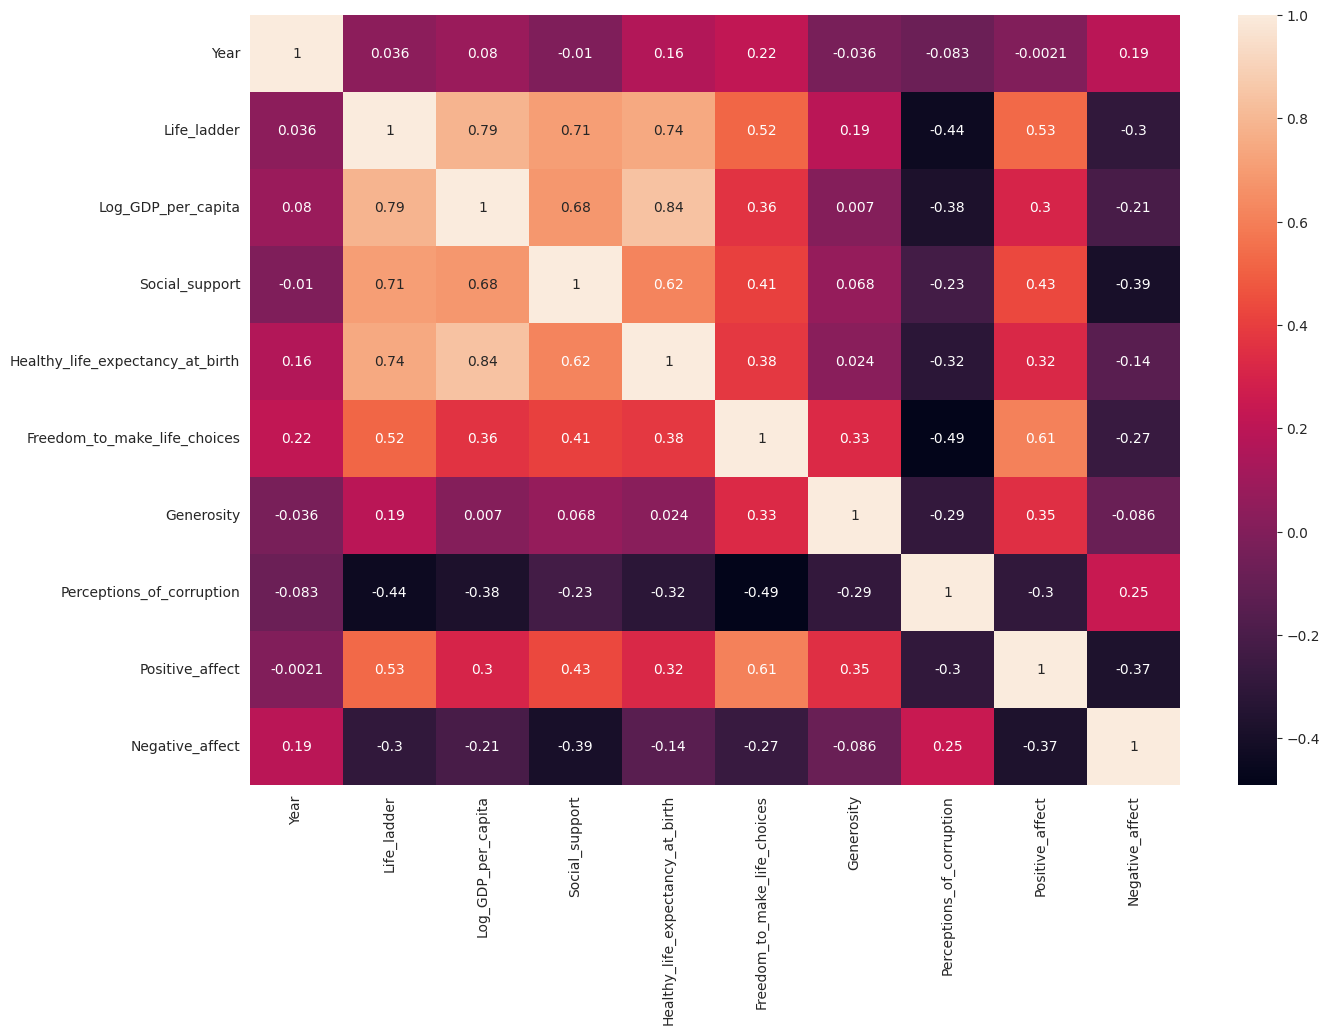

In [29]:
# Heatmap de correlações entre as colunas

plt.figure(figsize=(15, 10))
sns.heatmap(happydf.corr(),annot = True)

## Perceptions of Corruption por país e ano

In [30]:
# Calcula a média do 'Perceptions_of_corruption' e 'Log_GDP_per_capita' por país
avg_data = happydf.groupby('Country_name').agg({'Perceptions_of_corruption': 'mean', 'Log_GDP_per_capita': 'mean'}).reset_index()

# Cria o gráfico de barras
fig = px.bar(avg_data, x='Country_name', y='Perceptions_of_corruption', color='Log_GDP_per_capita', 
             color_continuous_scale='viridis', barmode='group')

# Personaliza os eixos e o título
fig.update_layout(
    title='Média das Percepção de Corrupção e dos log GDP per capita em função do país',
    xaxis_title='País',
    yaxis_title='Média das Percepção de Corrupção ',
    xaxis={'tickangle': 90})


fig.update_layout(width=3000, height=1000)
fig.show()

## Percepcao corrupção vs GDP per capita


In [70]:
# Calcula as médias
avg_perceptions_of_corruption = happydf['Perceptions_of_corruption'].mean()
avg_log_GDP_per_capita = happydf['Log_GDP_per_capita'].mean()

# Plot do gráfico de dispersão
fig = px.scatter(happydf, x='Log_GDP_per_capita', y='Perceptions_of_corruption')

# Adiciona marcadores para as médias
fig.add_shape(type='line', x0=happydf['Log_GDP_per_capita'].min(), x1=happydf['Log_GDP_per_capita'].max(),
              y0=avg_perceptions_of_corruption, y1=avg_perceptions_of_corruption,
              line=dict(color='red', width=2, dash='dash'),
              xref='x', yref='y')
fig.add_shape(type='line', x0=avg_log_GDP_per_capita, x1=avg_log_GDP_per_capita,
              y0=happydf['Perceptions_of_corruption'].min(), y1=happydf['Perceptions_of_corruption'].max(),
              line=dict(color='green', width=2, dash='dash'),
              xref='x', yref='y' )

# Configura o layout do gráfico
fig.update_layout(
    title='Log_GDP_per_capita vs Perceptions_of_corruption',
    xaxis_title='Log_GDP_per_capita',
    yaxis_title='Perceptions_of_corruption')

fig.show()

### Por media de cada pais 

In [69]:
# Calcula a média de 'Perceptions_of_corruption' por país
mean_corruption = happydf.groupby('Country_name')['Perceptions_of_corruption'].mean()

# Calcula a média de 'Log_GDP_per_capita' por país
mean_gdp = happydf.groupby('Country_name')['Log_GDP_per_capita'].mean()

# Cria o df com os dados
data = pd.DataFrame({' média Log PIB per capita': mean_gdp, 'Média percepção de corrupcao': mean_corruption})

# Calcula as médias dos valores em cada eixo
mean_gdp_avg = np.mean(mean_gdp)
mean_corruption_avg = np.mean(mean_corruption)

# Cria o gráfico scatter 
fig = px.scatter(data, x=' média Log PIB per capita', y='Média percepção de corrupcao', title='Média de corrupção vs Média PIB per capita',
                 width=2200, height=1200)

# Adiciona os rótulos dos países
for i, country in enumerate(data.index):
    fig.add_annotation(x=data[' média Log PIB per capita'][i], y=data['Média percepção de corrupcao'][i], text=country,font=dict(size=9))

# Adiciona uma linha vertical representando a media do log do PIB per capita
fig.add_vline(x=mean_gdp_avg, line_dash="dash", line_color="red")

# Adiciona uma linha horizontal representando a media de Percepcao de corrupcao
fig.add_hline(y=mean_corruption_avg, line_dash="dash", line_color="green")

fig.show()

# Machine learning

In [34]:
happydf

,Country_name,Year,Life_ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


## Regressão Polinomial

In [35]:
# Convertendo os dados para vetores
x = happydf['Freedom_to_make_life_choices'].values
y = happydf['Perceptions_of_corruption'].values

# Plot de dispersao
fig = px.scatter(happydf, x='Freedom_to_make_life_choices', y='Perceptions_of_corruption')

# Transformação polinomial dos dados
poly = PolynomialFeatures(degree=16)
x_poly = poly.fit_transform(x.reshape(-1, 1))

# Criação do modelo de regressão polinomial
model = LinearRegression()
model.fit(x_poly, y)

# Coeficientes do modelo
coefficients = model.coef_
intercept = model.intercept_

# Mostra a função 
function = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients[1:], 1):
    function += f" + {coef:.2f}x^{i}"
print("f(x)=",function)

# Predição dos valores para traçar a função
x_pred = np.linspace(min(x), max(x)).reshape(-1, 1)
x_pred_poly = poly.transform(x_pred)
y_pred = model.predict(x_pred_poly)

# Adiciona a linha da regressão polinomial ao gráfico
fig.add_trace(go.Scatter(x=x_pred.flatten(), y=y_pred.flatten(), mode='lines', name='Regressão Polinomial'))
fig.update_yaxes(gridcolor='black', showgrid=True)
fig.update_xaxes(gridcolor='black', showgrid=True)

fig.show()

f(x)= y = 332434.18 + -10104246.95x^1 + 141962189.55x^2 + -1224189168.66x^3 + 7254478328.46x^4 + -31336232749.30x^5 + 102099776531.40x^6 + -256048113650.71x^7 + 499659732975.56x^8 + -761498145342.57x^9 + 903639332097.26x^10 + -826400008276.75x^11 + 571142138752.36x^12 + -288448447715.11x^13 + 100419771187.76x^14 + -21536240727.51x^15 + 2143957381.67x^16


In [36]:
valor = 0.32
valor_poly = poly.transform([[valor]])
previsao = model.predict(valor_poly)
print(f"Previsão para o valor {valor}: {previsao[0]}")

Previsão para o valor 0.32: 0.8747662968817167


## Regressão Linear

In [37]:
happydf["Log_GDP_per_capita"].values

array([7.37 , 7.54 , 7.647, ..., 8.049, 7.95 , 7.829])

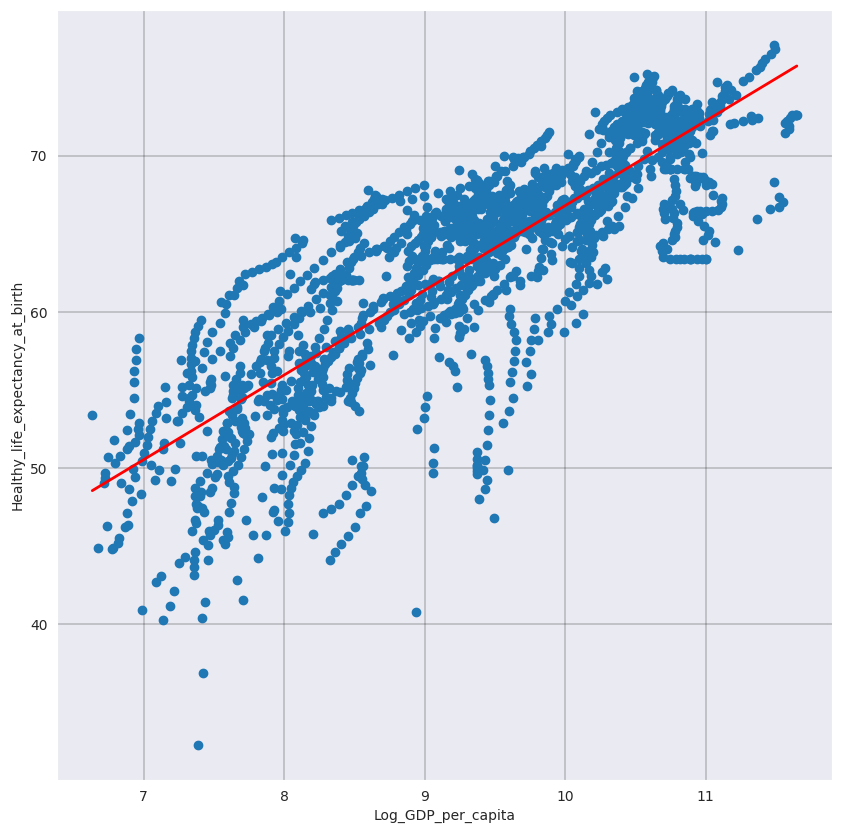

R^2 = 0.7031357332414716
y = [[5.42169574]]x + [12.57935602]


In [38]:
# Ajustando preditores e alvo
x = happydf["Log_GDP_per_capita"].values.reshape(-1,1)
y = happydf["Healthy_life_expectancy_at_birth"].values.reshape(-1,1)

LR_model = LinearRegression()
LR_model.fit(x,y)

# Espaça igualmente os valores de x e aplica o modelo 
X = np.linspace(min(x), max(x)).reshape(-1,1)
Y = LR_model.predict(X)

# Plot da regressão
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.plot(X, Y, color="red", linewidth=2)
plt.xlabel("Log_GDP_per_capita")
plt.ylabel("Healthy_life_expectancy_at_birth")
plt.grid(color='black', linestyle='-', linewidth=0.25)
plt.show()

# R^2 (coef. determinação)
r2 = LR_model.score(x, y)
print("R^2 = {}".format(r2))

# Equação da reta
a = LR_model.coef_
b = LR_model.intercept_
eq = "y = {}x + {}".format(a, b)
print(eq)

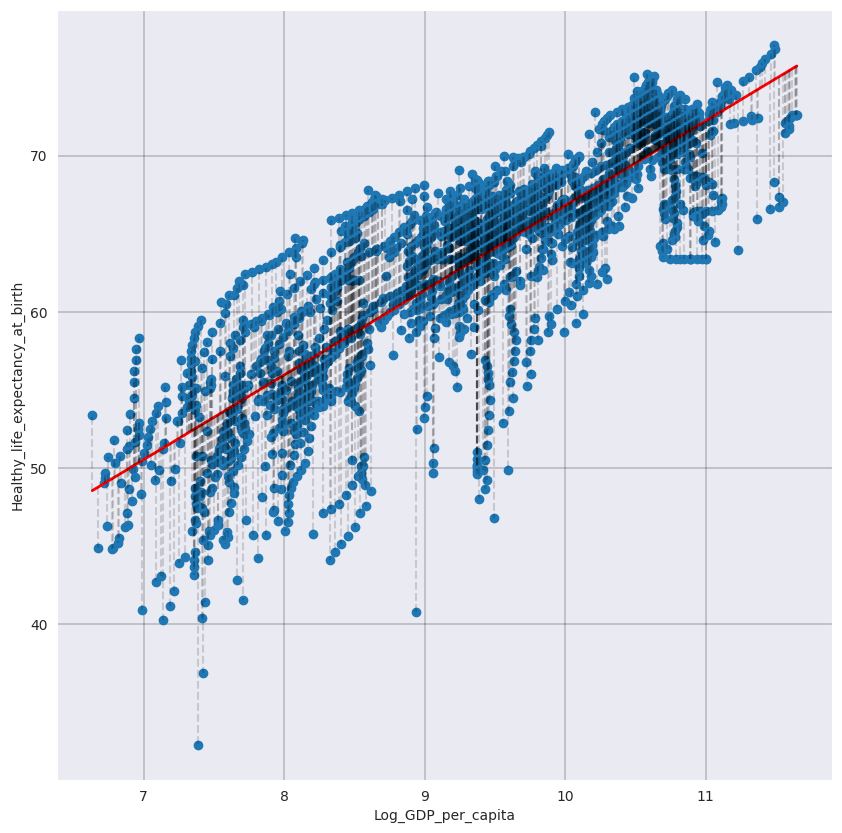

In [39]:
# Monta o gráfico igual ao de cima
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.plot(X, Y, color="red", linewidth=2)
plt.xlabel("Log_GDP_per_capita")
plt.ylabel("Healthy_life_expectancy_at_birth")
plt.grid(color='black', linestyle='-', linewidth=0.25)

# Plota os residuos
residuals = LR_model.predict(x).reshape(-1,1)
plt.vlines(x, residuals,y, linestyles="--", colors="black", label="Residuals", alpha=0.15)
plt.show()

In [40]:
# Valor especifico para fazer a previsão
valor_log = 7

# Preparando a matriz com o valor especificado
X_pred = np.array([[valor_log]])

# Faz a previsão
Y_pred = LR_model.predict(X_pred)
print(f"Previsão para o valor {valor_log}: {Y_pred}")

Previsão para o valor 7: [[50.53122624]]


## Regressão de floresta aleátoria 

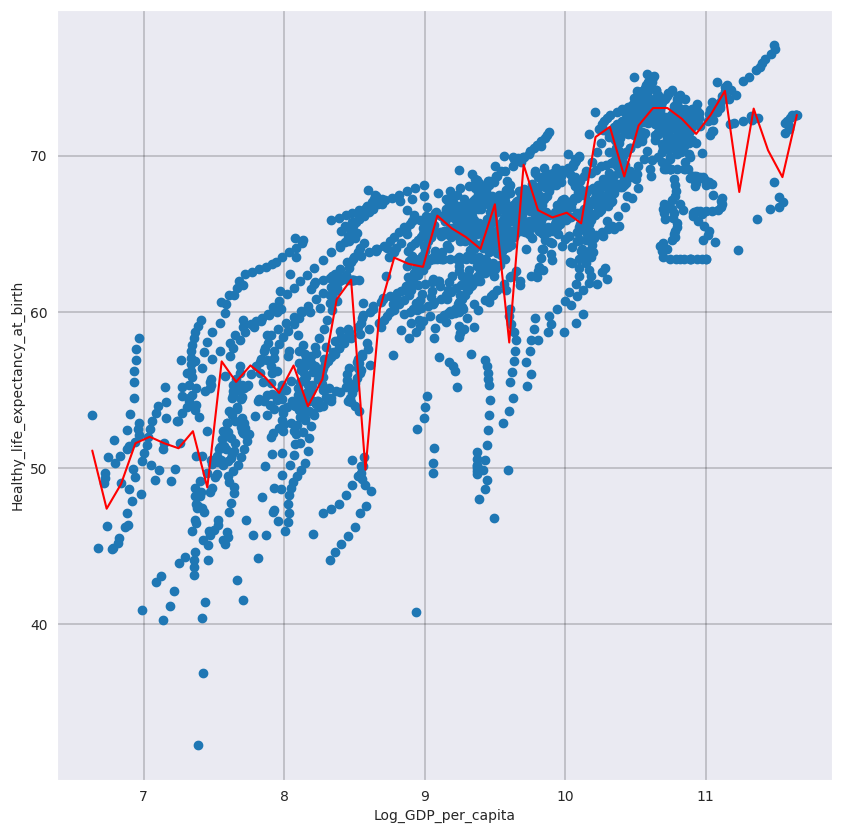

R^2 = 0.9061246780258807


In [41]:
# Atualiza y
y = happydf["Healthy_life_expectancy_at_birth"].values

# Gerando a random forest e dando fit
RF_model = RandomForestRegressor(n_estimators=250, random_state=40)
RF_model.fit(x,y)

# Espaça igualmente os valores de x e aplica o modelo 
X = np.linspace(min(x), max(x)).reshape(-1,1)
Y = RF_model.predict(X)

# Criando plot
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel("Log_GDP_per_capita")
plt.ylabel("Healthy_life_expectancy_at_birth")
plt.grid(color='black', linestyle='-', linewidth=0.25)
plt.plot(X, Y, color="red")
plt.show()

# R^2 (coef. determinação)
r2 = RF_model.score(x, y)
print("R^2 = {}".format(r2))

In [42]:
# Valor especifico para fazer a previsão
valor_log = 10

# Prepara a matriz com o valor especificado
X_pred = np.array([[valor_log]])

# Faz a previsão
Y_pred = RF_model.predict(X_pred)
print(f"Previsão para o valor {valor_log}: {Y_pred}") 

Previsão para o valor 10: [66.25216]
